In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from numpy import genfromtxt
import scipy.optimize as optimization
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


TAC calibration: 192 = 3.82 118 = 2.22

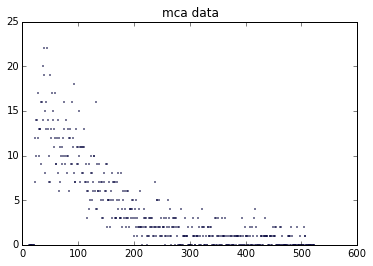

In [20]:
f = genfromtxt("muon_data_14May2015.mca", delimiter=',')
x = np.arange(0, len(f))

plt.plot(x, f, 'o', markersize = 1)
plt.title('mca data')


plt.show()